NOTE: In this task I have tested Converting pdf to direct images and achieved quite good results but I have achieved better results by implementing the task on individual screenshots.

# Imports

In [456]:
# page_1
# !wget "https://www.dropbox.com/s/717x75y71kmmgoa/Screenshot%202021-04-26%2016.32.38.png?dl=0"

In [457]:
#page_1 continue
# !wget "https://www.dropbox.com/s/wv3tjsi81oq8c1j/Screenshot%202021-04-26%2016.33.01.png?dl=0"

In [458]:
#page_2
# !wget "https://www.dropbox.com/s/nxwerdhepmoshnz/Screenshot%202021-04-26%2016.33.23.png?dl=0"

In [459]:
#page_3 
# !wget "https://www.dropbox.com/s/xmzll58unpabiri/Screenshot%202021-04-26%2016.34.13.png?dl=0"

In [460]:
#page_3 continue
# !wget "https://www.dropbox.com/s/dngmuyq517obx8m/Screenshot%202021-04-26%2016.34.38.png?dl=0"

In [461]:
#page_4
# !wget "https://www.dropbox.com/s/0h6mcbd2dggzhdy/Screenshot%202021-04-26%2016.35.03.png?dl=0"

In [462]:
#page_4 continue
# !wget "https://www.dropbox.com/s/tjda8vasrja1p1i/Screenshot%202021-04-26%2016.35.20.png?dl=0"

In [463]:
#page_5
# !wget "https://www.dropbox.com/s/lzey7wzf1jeg9rd/Screenshot%202021-04-26%2016.35.37.png?dl=0"

In [464]:
#page_5 continue
# !wget "https://www.dropbox.com/s/3ltapdh1yo05djf/Screenshot%202021-04-26%2016.35.51.png?dl=0"

In [2]:
!wget "https://www.dropbox.com/s/qhnz4t2ldnnhjj3/frozen_east_text_detection.pb?dl=0"

--2021-04-26 17:40:20--  https://www.dropbox.com/s/qhnz4t2ldnnhjj3/frozen_east_text_detection.pb?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:601a:18::a27d:712
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/qhnz4t2ldnnhjj3/frozen_east_text_detection.pb [following]
--2021-04-26 17:40:20--  https://www.dropbox.com/s/raw/qhnz4t2ldnnhjj3/frozen_east_text_detection.pb
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc3d6745beabd6dfffd5664682e5.dl.dropboxusercontent.com/cd/0/inline/BNUurq93Q9O4SalrIL-dDxNUZNRN4hyT3Xvf5ADSRRZRqpjKqCtf_UPZ003sJpqOnqPbODHOB8153ulzeFXwe6qeAYKPXaAO-mn7ORJXviKXTRKeEYS2Vsu9KzJkcAM3MLqim4e-BUxuzSYanF_mYfWa/file# [following]
--2021-04-26 17:40:21--  https://uc3d6745beabd6dfffd5664682e5.dl.dropboxusercontent.com/cd/0/inline/BNUurq93Q9O4SalrIL-dDxNUZNRN4hyT3X

In [ ]:
pip install pytesseract

In [ ]:
!sudo apt install tesseract-ocr

In [6]:
# import the necessary packages
from imutils.object_detection import non_max_suppression
from google.colab.patches import cv2_imshow
import numpy as np
import pytesseract
import time
import cv2

# Text Detection and Bounding Box 

In [465]:
# load the input image and grab the image dimensions
image = cv2.imread('Screenshot 2021-04-26 16.35.51.png?dl=0')
orig = image.copy()
(H, W) = image.shape[:2]

# set the new width and height and then determine the ratio in change
# for both the width and height
(newW, newH) = (1280,1280)
rW = W / float(newW)
rH = H / float(newH)

# resize the image and grab the new image dimensions
image = cv2.resize(image, (newW, newH))
(H, W) = image.shape[:2]

In [466]:
print(H,W)

1280 1280


In [467]:
# define the two output layer names for the EAST detector model that
# we are interested -- the first is the output probabilities and the
# second can be used to derive the bounding box coordinates of text
layerNames = [
    "feature_fusion/Conv_7/Sigmoid",
    "feature_fusion/concat_3"]

# load the pre-trained EAST text detector
print("[INFO] loading EAST text detector...")
net = cv2.dnn.readNet('frozen_east_text_detection.pb')

# construct a blob from the image and then perform a forward pass of
# the model to obtain the two output layer sets
blob = cv2.dnn.blobFromImage(image, 1.0, (W, H),
                             (123.68, 116.78, 103.94), swapRB=True, crop=False)
start = time.time()
net.setInput(blob)
(scores, geometry) = net.forward(layerNames)
end = time.time()

[INFO] loading EAST text detector...


In [468]:
# show timing information on text prediction
print("[INFO] text detection took {:.6f} seconds".format(end - start))
#print(scores)
#print(scores.shape[2:4])

[INFO] text detection took 9.047872 seconds


In [469]:
# grab the number of rows and columns from the scores volume, then
# initialize our set of bounding box rectangles and corresponding
# confidence scores
(numRows, numCols) = scores.shape[2:4]

In [470]:
print(numRows,numCols)

320 320


In [471]:
# loop over the number of rows
box_dict={}
rects_2=[]
confi = []
for y in range(0, numRows):
    # extract the scores (probabilities), followed by the geometrical
    # data used to derive potential bounding box coordinates that
    # surround text
    scoresData = scores[0, 0, y]
    xData0 = geometry[0, 0, y]
    xData1 = geometry[0, 1, y]
    xData2 = geometry[0, 2, y]
    xData3 = geometry[0, 3, y]
    anglesData = geometry[0, 4, y]

    
    # loop over the number of columns
    for x in range(0, numCols):
        # if our score does not have sufficient probability, ignore it
        if scoresData[x] < 0.5:
            continue

        # compute the offset factor as our resulting feature maps will
        # be 4x smaller than the input image
        (offsetX, offsetY) = (x * 4.0, y * 4.0)

        # extract the rotation angle for the prediction and then
        # compute the sin and cosine
        angle = anglesData[x]
        cos = np.cos(angle)
        sin = np.sin(angle)

        # use the geometry volume to derive the width and height of
        # the bounding box
        h = xData0[x] + xData2[x]
        w = xData1[x] + xData3[x]

        # compute both the starting and ending (x, y)-coordinates for
        # the text prediction bounding box
        endX = int(offsetX + (cos * xData1[x]) + (sin * xData2[x]))
        endY = int(offsetY - (sin * xData1[x]) + (cos * xData2[x]))
        startX = int(endX - w)
        startY = int(endY - h)

        # add the bounding box coordinates and probability score to
        # our respective lists
        rects_2.append((startX, startY, endX, endY))
        confi.append(scoresData[x])

    rowBoxes = sorted(rects_2,key=lambda x:x[0])
    # apply non-maxima suppression to suppress weak, overlapping bounding
    # boxes
    box_dict[y] = non_max_suppression(np.array(rowBoxes),probs=confi)
    rects_2 = []
    confi = []


In [472]:
print(len(box_dict))

320


In [473]:
from itertools import product

close_dist = 12.5
merged_boxes = []

# common version
def should_merge(box1, box2):
    for i in range(2):
        for j in range(2):
            for k in range(2):
                if abs(box1[j * 2 + i] - box2[k * 2 + i]) <= close_dist:
                    return True, [min(box1[0], box2[0]), min(box1[1], box2[1]),  box2[0] + box2[2] - box1[0],
                                  max(box1[1] + box1[3], box2[1] + box2[3]) - min(box1[1], box2[1])]
    return False, None


# use product, more concise
def should_merge2(box1, box2):
    a = (box1[0], box1[2]), (box1[1], box1[3])
    b = (box2[0], box2[2]), (box2[1], box2[3])
    #print(a,b)

    if any(abs(a_v - b_v) <= close_dist for i in range(2) for a_v, b_v in product(a[i], b[i])):
        return True, [min(*a[0], *b[0]), min(*a[1], *b[1]), max(*a[0], *b[0]), max(*a[1], *b[1])]

    return False, None

def merge_box(boxes):
    new_box=0
    store_new_box = boxes[0]
    
    for i, box1 in enumerate(boxes[:-1]):
        for j, box2 in enumerate(boxes[i + 1:]):
            is_merge, new_box = combineBoundingBox(store_new_box, box2)
            store_new_box = new_box
            if is_merge:
                boxes[i+1] = new_box
                #boxes[j] = new_box
                break
    return new_box

In [474]:
merged_boxes=[]

In [475]:
boxes_row = []
for key in box_dict:
  if len(box_dict[key]) > 0:
    boxes_row = sorted(box_dict[key],key=lambda x:x[0])
    temp = merge_box(boxes_row)
    merged_boxes.append(temp)

In [476]:
len(merged_boxes)

83

In [477]:
test_boxes_3=[]
test_boxes_3 = list(filter(None, merged_boxes))

In [478]:
len(test_boxes_3)

59

In [479]:
test_boxes_4 = non_max_suppression(np.array(test_boxes_3))

In [480]:
len(test_boxes_4)

18

## Bounding Box Plotting

In [481]:
results = []
ROI_number = 1
rectangled_dict = {}
# loop over the bounding boxes
for (startX, startY, endX, endY) in test_boxes_4:
    # scale the bounding box coordinates based on the respective
    # ratios
    startX = int(startX * rW)
    startY = int(startY * rH)
    endX = int(endX * rW)
    endY = int(endY * rH)

    ROI = orig[startY:endY, startX:endX]
    rectangled_dict[ROI_number] = ROI
    # draw the bounding box on the image
    cv2.rectangle(orig, (startX, startY), (endX, endY), (0, 255, 0), 2)
    cv2.imwrite("Page_cont_5_"+str(ROI_number)+'.jpg', ROI)
    #configuration setting to convert image to string.  
    configuration = ("-l eng --oem 1 --psm 13")
    # This will recognize the text from the image of bounding box
    text = pytesseract.image_to_string(ROI, config=configuration)
    # append bbox coordinate and associated text to the list of results 
    results.append(((startX, startY, endX, endY), text,"Page_cont_5_"+str(ROI_number)))
    ROI_number+=1

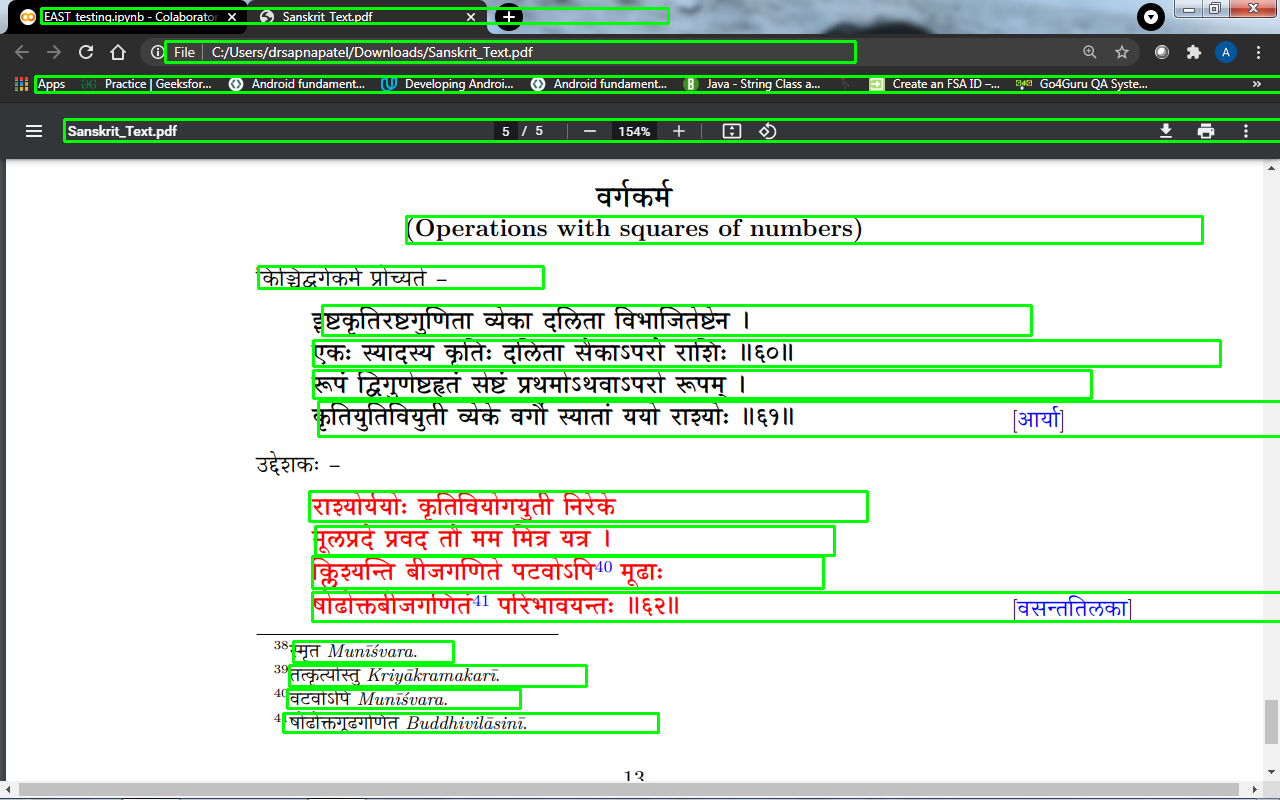

In [482]:
cv2_imshow(orig)

In [413]:
im = cv2.imread("Page_cont_5_14.jpg")
cv2_imshow(im)

In [389]:
temp_dict = {} # For storing bounding box coordinates page wise

In [30]:
main_dict = {} # For storing bounding box coordinates

In [144]:
# Function to find the coordinates of Bounding box
def find_coord(result,box_number):
  cord_dict = {}
  x = result[0]
  y = result[1]
  end_x = result[2]
  end_y = result[3]

  height = end_y-y
  width = end_x-x

  x_w = int(x+w)
  y_h = int(y+h)
  cord_dict["top_left"] = [x,y]
  cord_dict["top_right"] = [x,y_h]
  cord_dict["bottom_left"] = [x_w,y]
  cord_dict["bottom_right"] = [x_w,y_h]

  main_key = "box"+str(box_number)
  main_dict[main_key] = cord_dict
  temp_dict[main_key] = cord_dict


In [429]:
find_coord(results[0][0],86)

In [430]:
main_dict

{'box1': {'bottom_left': [395, 308],
  'bottom_right': [395, 346],
  'top_left': [322, 308],
  'top_right': [322, 346]},
 'box10': {'bottom_left': [429, 382],
  'bottom_right': [429, 409],
  'top_left': [300, 382],
  'top_right': [300, 409]},
 'box11': {'bottom_left': [434, 410],
  'bottom_right': [434, 437],
  'top_left': [305, 410],
  'top_right': [305, 437]},
 'box12': {'bottom_left': [407, 458],
  'bottom_right': [407, 485],
  'top_left': [278, 458],
  'top_right': [278, 485]},
 'box13': {'bottom_left': [650, 235],
  'bottom_right': [650, 273],
  'top_left': [532, 235],
  'top_right': [532, 273]},
 'box14': {'bottom_left': [376, 341],
  'bottom_right': [376, 379],
  'top_left': [258, 341],
  'top_right': [258, 379]},
 'box15': {'bottom_left': [431, 400],
  'bottom_right': [431, 438],
  'top_left': [313, 400],
  'top_right': [313, 438]},
 'box16': {'bottom_left': [428, 428],
  'bottom_right': [428, 466],
  'top_left': [310, 428],
  'top_right': [310, 466]},
 'box17': {'bottom_left':

In [415]:
results[13]

((406, 216, 1202, 243),
 '(Operations with squares of numbers) = |\n\x0c',
 'Page_cont_5_14')

In [66]:
pageWise_dict = {} # This Dictionary stores coordinates page wise

In [432]:
pageWise_dict["page5_continue"] = temp_dict

In [433]:
pageWise_dict

{'page1': {'box1': {'bottom_left': [395, 308],
   'bottom_right': [395, 346],
   'top_left': [322, 308],
   'top_right': [322, 346]},
  'box10': {'bottom_left': [429, 382],
   'bottom_right': [429, 409],
   'top_left': [300, 382],
   'top_right': [300, 409]},
  'box11': {'bottom_left': [434, 410],
   'bottom_right': [434, 437],
   'top_left': [305, 410],
   'top_right': [305, 437]},
  'box12': {'bottom_left': [407, 458],
   'bottom_right': [407, 485],
   'top_left': [278, 458],
   'top_right': [278, 485]},
  'box13': {'bottom_left': [650, 235],
   'bottom_right': [650, 273],
   'top_left': [532, 235],
   'top_right': [532, 273]},
  'box14': {'bottom_left': [376, 341],
   'bottom_right': [376, 379],
   'top_left': [258, 341],
   'top_right': [258, 379]},
  'box15': {'bottom_left': [431, 400],
   'bottom_right': [431, 438],
   'top_left': [313, 400],
   'top_right': [313, 438]},
  'box16': {'bottom_left': [428, 428],
   'bottom_right': [428, 466],
   'top_left': [310, 428],
   'top_right

## Storing Data in JSON

In [434]:
import json

In [452]:
with open('boxes_coordinates.json','w') as fp:
  json.dump(main_dict,fp,sort_keys=True,indent=4)

In [453]:
with open('pageWise_boxes_coordinates.json','w') as fp:
  json.dump(pageWise_dict,fp,sort_keys=True,indent=4)

In [454]:
with open('boxes_coordinates.json') as fp:
  data = json.load(fp)

In [ ]:
#pip install pdf2image

In [ ]:
#!wget "https://www.dropbox.com/s/xsh6jk28pb44bw9/Sanskrit_Text.pdf?dl=0"

In [ ]:
#!sudo apt-get install poppler-utils

In [ ]:
#from pdf2image import convert_from_path
#images = convert_from_path("Sanskrit_Text.pdf", 1280)
#for i, image in enumerate(images):
 #   fname = 'image'+str(i)+'.png'
  #  image.save(fname, "PNG")

In [ ]:
#im = cv2.imread("image4.png")
#cv2_imshow(im)